# Backpro_Neural_Network_JEC

Este ejemplo se incorpora el backpropagation para una red simple.

Se asignan pesos de manera aleatoria pero se entrena con 100.000 epochs y vemos como mejora la accuracy.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [19]:
# Funcion que recibe la matriz de entrada (INPUT), los pesos y bias de la primera capa
# y los pesos y bias de la segunda capa
def forward(X, W1, b1, W2, b2):
    # En la capa hidden vamos a usar la sigmoide como funcion de activacion
    # entonces usamos X, W1 y b1
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    
    # luego para la capa de salida usamos Z, W2 y el bias y aplicamos la sigmoide 
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

#### OJO también se devuelve Z 8de la capa hidden)

In [20]:
# Calculamos la accuracy del experimento
# num correctos / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in xrange(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [21]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1] # H is (N, M)

    # # 1ra version - lenta 
    # ret1 = np.zeros((M, K))
    # for n in xrange(N):
    #     for m in xrange(M):
    #         for k in xrange(K):
    #             ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m]

    # # 2da. version - mas rapida que la anterior - no hacemos el loop sobre "m"
    # ret2 = np.zeros((M, K))
    # for n in xrange(N):
    #     for k in xrange(K):
    #         ret2[:,k] += (T[n,k]* - Y[n,k])*Z[n,:]

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    # # 3ra. version - mas rapida aun - tampoco hacemos el loop sobre "k"
    # ret3 = np.zeros((M, K))
    # for n in xrange(N): # slow way first
    #     ret3 += np.outer( Z[n], T[n] - Y[n] )

    # assert(np.abs(ret1 - ret3).sum() < 0.00001)

    # 4ta. version - las mas rapida - no hay loops
    ret4 = Z.T.dot(T - Y)
    # assert(np.abs(ret1 - ret4).sum() < 0.00001)

    return ret4

In [22]:
def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape

    # version lenta
    # ret1 = np.zeros((X.shape[1], M))
    # for n in xrange(N):
    #     for k in xrange(K):
    #         for m in xrange(M):
    #             for d in xrange(D):
    #                 ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1 - Z[n,m])*X[n,d]

    # mas rapida
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    return ret2

In [23]:
def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)

In [24]:
def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

In [25]:
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

In [26]:
# Creamos los datos....
Nclass = 500

D = 2 # dimensionalidad de la entrada
M = 3 # numero de neuronas de la hidden
K = 3 # numero de clases

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)

# Convertimos a Y en una matriz de indicadores para el training
T = np.zeros((N, K))
for i in xrange(N):
    T[i, Y[i]] = 1


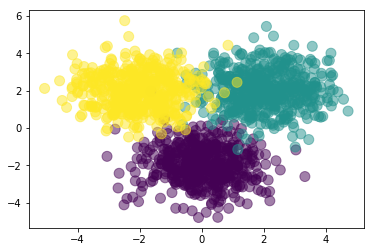

In [27]:
# Los ploteamos para ver que aspecto tienen
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [28]:
# Inicializamos los pesos
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [29]:
# Establecemos el learning rate y creamos una lista vacia para guardar el coste
learning_rate = 10e-7
costs = []
class_rate = []
num_epochs = 100000

In [33]:
for epoch in xrange(num_epochs):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 1000 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print "cost:", c, "classification_rate:", r
        costs.append(c)
        class_rate.append(r)

    # aqui usaremos gradient ASCENT, no DESCENT
    # para el caso es lo mismo.... 
    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)


cost: -146.260975275 classification_rate: 0.971333333333
cost: -145.699932266 classification_rate: 0.971333333333
cost: -145.154096583 classification_rate: 0.971333333333
cost: -144.622899335 classification_rate: 0.971333333333
cost: -144.105798736 classification_rate: 0.971333333333
cost: -143.60227854 classification_rate: 0.971333333333
cost: -143.111846587 classification_rate: 0.971333333333
cost: -142.634033438 classification_rate: 0.971333333333
cost: -142.168391104 classification_rate: 0.971333333333
cost: -141.714491862 classification_rate: 0.971333333333
cost: -141.271927142 classification_rate: 0.971333333333
cost: -140.840306485 classification_rate: 0.971333333333
cost: -140.419256575 classification_rate: 0.971333333333
cost: -140.008420323 classification_rate: 0.971333333333
cost: -139.607456011 classification_rate: 0.971333333333
cost: -139.216036492 classification_rate: 0.971333333333
cost: -138.833848436 classification_rate: 0.971333333333
cost: -138.460591619 classificat

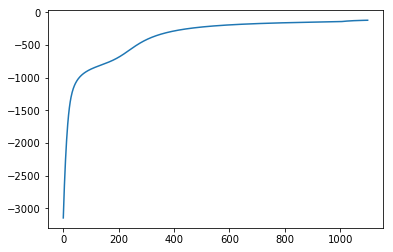

In [34]:
#Ploteamos como evoluciona el coste...
plt.plot(costs)
plt.show()

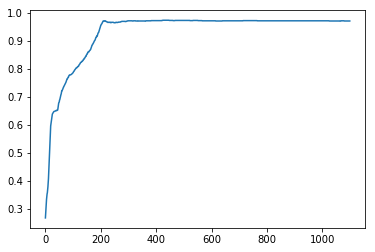

In [35]:
#Ploteamos como evoluciona el class_rate..
plt.plot(class_rate)
plt.show()

Aqui se puede ver como el ratio de clasificación va aumentando con las epochs.
Solo se ha aplicado learning_rate al backpro. No hay momentum ni batches.